In [360]:
from PIL import Image, ImageFilter
from IPython.display import display
from skimage import util, img_as_ubyte, io
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from scipy import ndimage, misc
%matplotlib inline

In [362]:
image_size = 90
set_size = 1000

In [451]:
im = Image.open('w.png')
im = im.resize((image_size,image_size))

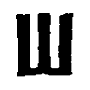

In [452]:
display(im)

In [453]:
im = im.convert('L')

In [454]:
im = im.quantize(2)

In [455]:
im.getcolors()

[(5711, 0), (2389, 1)]

In [456]:
coord = im.getbbox()

In [457]:
letter = im.crop(coord)

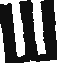

In [458]:
display(letter.rotate(6))

In [459]:
directory = './letters/w'
if not os.path.exists(directory):
    os.makedirs(directory)

In [442]:
size_deviation = 0.05

In [460]:
for i in range(set_size):
    new = Image.new('L', im.size, 255)
    angle = np.random.randint(-6, 7)
    height_bias = np.random.randint(im.height - letter.height)
    width_bias = np.random.randint(im.width - letter.width)
    delta_height = np.random.randint(-int(im.height*size_deviation), int(im.height*size_deviation))
    delta_width = np.random.randint(-int(im.width*size_deviation), int(im.width*size_deviation))
    #print(angle, width_bias, height_bias)
    new.paste(letter.resize((letter.height + delta_height, letter.width + delta_width)).rotate(angle), (height_bias, width_bias))
    new = new.quantize(2)
    #print(new.getcolors())
    new.save('./letters/w/' + str(i) + '.png', 'PNG')

In [461]:
letter_folder = directory

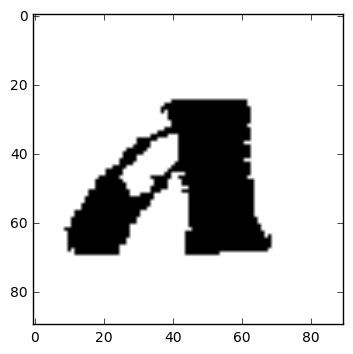

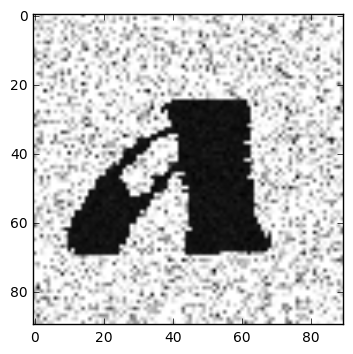

In [279]:
def np_show(letter_folder):
    files = os.listdir(letter_folder)
    f_name = os.path.join(letter_folder, files[np.random.randint(len(files))])
    if 'DS_store' not in f_name:
        let = ndimage.imread(f_name, mode = 'L')
        plt.imshow(let, cmap = 'gray')
        plt.show()
        #print(let)
        let = util.random_noise(let, mode = 'speckle', var = 0.1)
        #let = util.random_noise(let, mode = 's&p', amount = 0.3, salt_vs_pepper = 0.9)
        #print(let.shape)
        plt.imshow(let, cmap='gray')
        plt.show()
        #io.imsave(f_name, let)
np_show(letter_folder)    

In [260]:
def check(letter_folder, noise_function):
    files = os.listdir(letter_folder)
    f_name = os.path.join(letter_folder, files[np.random.randint(len(files))])
    if 'DS_store' not in f_name:
        let = ndimage.imread(f_name, mode = 'L')
        plt.imshow(let, cmap = 'gray')
        plt.show()
        #print(let)
        let = noise_function(let)
        #let = util.random_noise(let, mode = 's&p', amount = 0.3, salt_vs_pepper = 0.9)
        #print(let.shape)
        plt.imshow(let, cmap='gray')
        plt.show()
        #io.imsave(f_name, let)

In [352]:
def rand_noise(let):
    let = util.random_noise(let, mode = 's&p', amount = 0.3, salt_vs_pepper = 0.95)
    return let

In [353]:
def select_rows(let):
    width_of_stripe = 6
    row = np.random.randint(width_of_stripe//2, let.shape[0] - width_of_stripe//2)
    for i in range(row - width_of_stripe//2, row + width_of_stripe//2):
        let[i,:] = 255
    return let

In [354]:
def clear(let):
    return let

In [355]:
def blur(let):
    let = cv2.blur(let, (10,10))
    return let

In [462]:
files = os.listdir(letter_folder)
func_list = [blur, select_rows, rand_noise, clear]
for i in range(2):
    for f_name in files:
        #f_name = os.path.join(letter_folder, files[np.random.randint(len(files))])
        if '.DS_Store' not in f_name:
            let = ndimage.imread(os.path.join(letter_folder,f_name), mode = 'L')
            let = func_list[np.random.randint(len(func_list))](let)
            misc.imsave(os.path.join(letter_folder,f_name), let)

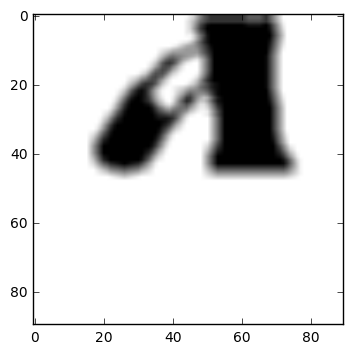

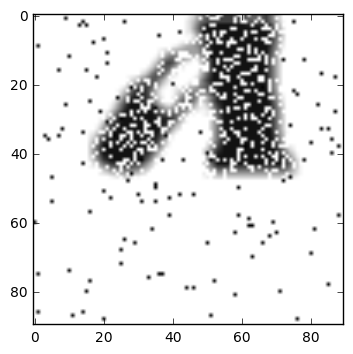

In [311]:
check(letter_folder, rand_noise)

In [483]:
let = ndimage.imread('file.png', mode = 'L')
let = func_list[np.random.randint(len(func_list))](let)
misc.imsave('file.png', let)

In [484]:
a = 5+3

8

$$ \sqrt2 $$